**Importing libraries** 

In [1]:
#import important library
import numpy as np
import pandas as pd

import io #Importing input module

from sklearn.model_selection import train_test_split
from sklearn import linear_model  # Importing linear model

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#import model library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Importing data**

In [3]:
#import dataset

data = pd.read_csv('biodeg.csv',sep=';')
data

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


**Data processing**

In [4]:
#Get binary classification of the response 
response = np.unique(data['experimental_class'])
print('Target variables  : ', response)


Target variables  :  ['NRB' 'RB']


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Extract features and response into respective y and X variable
y = data['experimental_class'].values
X = data[data.keys()[:-1]]

#Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
# Import the feature selection library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
#apply SelectKBest class to extract top 10 best features
#chi square is used as the feature selection method
#the lesser score acquired, the stronger the relationship with the response
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.keys()[:-1])

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featuresTop = featureScores.nsmallest(10,'Score')

X_arr = np.array(featuresTop['Features']) #Assign the best features to an array for later use
print ("Top 10 features selected based on the Chi Square method:")
print ("--------------------------------------------------------")
print(featuresTop)  #display 10 best features


Top 10 features selected based on the Chi Square method:
--------------------------------------------------------
    Features     Score
1    J_Dz(e)  0.000139
15  F03[C-O]  0.001195
27  Psi_i_1d  0.006990
11     SdssC  0.156340
34     nHDon  0.185663
8        nCp  0.387754
17        Mi  0.427909
29       SdO  0.686679
16        Me  0.957503
36   Psi_i_A  1.208577


In [8]:
#Splitting the dataset into train, test and validation set
X = data[X_arr].values
seed_num = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(675, 10)
(169, 10)
(211, 10)


**k-Nearest Neighbour**

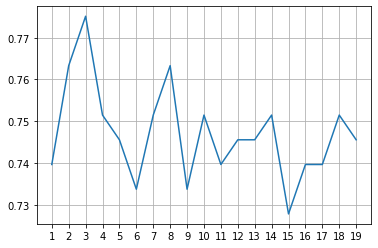

Best k score: 0.7751479289940828
Best k value: 3


In [9]:
#find the best k to train the model
#implement a validation test
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(X_train, y_train)
  score = model_knn.score(X_val, y_val)
  if score > max_score:
    max_score = score
    best_k = k
  scores.append(score)
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print("Best k score:", max(scores))
print("Best k value:", best_k)

In [10]:
#model training 
#using optimized k
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print("Analysis for k-Nearest Neighbors (k value = ", best_k, "):")
print("------------------------------------------------")

print("\nAccuracy: " + str(accuracy_score(y_test, y_pred)) + "\n") #precision, recall, f1-score

print(classification_report(y_test, y_pred))

print("\nConfusion Matric:")
print(confusion_matrix(y_test, y_pred))

Analysis for k-Nearest Neighbors (k value =  3 ):
------------------------------------------------

Accuracy: 0.7630331753554502

              precision    recall  f1-score   support

         NRB       0.82      0.84      0.83       147
          RB       0.62      0.58      0.60        64

    accuracy                           0.76       211
   macro avg       0.72      0.71      0.71       211
weighted avg       0.76      0.76      0.76       211


Confusion Matric:
[[124  23]
 [ 27  37]]


In [11]:
#convert the binary classification clasess into numerical values 
#so that it can be plotted 
#'RB' is equal to value 1 (true)
#'NRB' is equal to value 0 (false)

def y_to_numeric(y):
  y_test_list = []
  for i, value in enumerate(y):
    if (value == response[1]):
      y_test_list.append(1)
    else:
      y_test_list.append(0)

  return np.array(y_test_list)


In [12]:
#set data size into two features
X = data[X_arr[:2]].values
seed_num = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)

model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

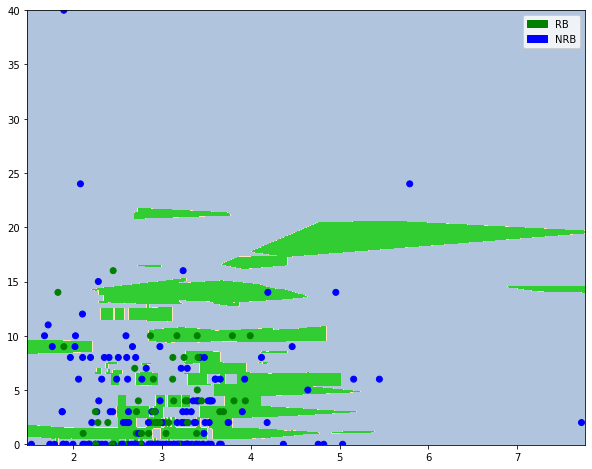

In [14]:
#plot graph for visual representation
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['lightsteelblue', 'bisque', 'limegreen'])
cmap_points = ListedColormap(['blue', 'orange', 'green'])
offset = 0.05
step = 0.02
x1_min, x1_max = X_test[:,0].min()-offset, X_test[:,0].max()+offset
x2_min, x2_max = X_test[:,1].min()-offset, X_test[:,1].max()+offset
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
Z = model_knn.predict(np.c_[xx1.ravel(),xx2.ravel()])
Z = y_to_numeric(Z)
Z = Z.reshape(xx1.shape)
plt.figure(figsize=(10,8))
plt.contourf(xx1, xx2, Z, cmap=cmap_regions)
plt.scatter(X_test[:,0], X_test[:,1], c= y_to_numeric(y_test), cmap=cmap_points)

leg_a = mpatches.Patch(color='green', label='RB')
leg_b = mpatches.Patch(color='blue', label='NRB')
plt.legend(handles=[leg_a,leg_b])

**Decision Tree**

In [15]:
#model training
model_dt = DecisionTreeClassifier(criterion='gini', random_state=seed_num, max_depth = None) 

X = data[X_arr].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [16]:
# data analysis 
y_pred = model_dt.predict(X_test)
print("Accuracy of Decision Tree Algorithm: ")
print(accuracy_score(y_test, y_pred))
print('---------------------------------------------------')
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print('---------------------------------------------------')
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Accuracy of Decision Tree Algorithm: 
0.7582938388625592
---------------------------------------------------
Confusion Matrix: 
[[119  28]
 [ 23  41]]
---------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

         NRB       0.84      0.81      0.82       147
          RB       0.59      0.64      0.62        64

    accuracy                           0.76       211
   macro avg       0.72      0.73      0.72       211
weighted avg       0.76      0.76      0.76       211



In [17]:
dt_models = []
depths = np.arange(1,14)
for d in depths:
    model = DecisionTreeClassifier(criterion='gini', min_samples_split=15, max_depth=d, random_state=seed_num)
    model.fit(X_train, y_train)
    dt_models.append(model)

In [18]:
#display mean accuracy for each depth
best_acc = 0
model_best = None
for m,d in zip(dt_models, depths):
    acc = m.score(X_val, y_val)
    print(f'Decision Tree classifier with max_depth={d} achieves a mean accuracy of {acc}')
    if acc > best_acc:
        best_acc = acc
        model_best = m

Decision Tree classifier with max_depth=1 achieves a mean accuracy of 0.6804733727810651
Decision Tree classifier with max_depth=2 achieves a mean accuracy of 0.7455621301775148
Decision Tree classifier with max_depth=3 achieves a mean accuracy of 0.7455621301775148
Decision Tree classifier with max_depth=4 achieves a mean accuracy of 0.7455621301775148
Decision Tree classifier with max_depth=5 achieves a mean accuracy of 0.7751479289940828
Decision Tree classifier with max_depth=6 achieves a mean accuracy of 0.757396449704142
Decision Tree classifier with max_depth=7 achieves a mean accuracy of 0.7810650887573964
Decision Tree classifier with max_depth=8 achieves a mean accuracy of 0.7869822485207101
Decision Tree classifier with max_depth=9 achieves a mean accuracy of 0.757396449704142
Decision Tree classifier with max_depth=10 achieves a mean accuracy of 0.7633136094674556
Decision Tree classifier with max_depth=11 achieves a mean accuracy of 0.757396449704142
Decision Tree classifi

In [19]:
#display result
from sklearn.tree import plot_tree, export_text  
print(export_text(model_best, feature_names=list(X_arr)))

|--- Mi <= 1.14
|   |--- F03[C-O] <= 0.50
|   |   |--- SdssC <= 1.59
|   |   |   |--- Psi_i_1d <= 0.05
|   |   |   |   |--- Psi_i_1d <= -0.02
|   |   |   |   |   |--- J_Dz(e) <= 3.12
|   |   |   |   |   |   |--- class: NRB
|   |   |   |   |   |--- J_Dz(e) >  3.12
|   |   |   |   |   |   |--- class: NRB
|   |   |   |   |--- Psi_i_1d >  -0.02
|   |   |   |   |   |--- J_Dz(e) <= 2.44
|   |   |   |   |   |   |--- class: NRB
|   |   |   |   |   |--- J_Dz(e) >  2.44
|   |   |   |   |   |   |--- J_Dz(e) <= 2.47
|   |   |   |   |   |   |   |--- class: RB
|   |   |   |   |   |   |--- J_Dz(e) >  2.47
|   |   |   |   |   |   |   |--- J_Dz(e) <= 3.02
|   |   |   |   |   |   |   |   |--- class: NRB
|   |   |   |   |   |   |   |--- J_Dz(e) >  3.02
|   |   |   |   |   |   |   |   |--- class: NRB
|   |   |   |--- Psi_i_1d >  0.05
|   |   |   |   |--- class: NRB
|   |   |--- SdssC >  1.59
|   |   |   |--- class: RB
|   |--- F03[C-O] >  0.50
|   |   |--- Psi_i_1d <= 0.00
|   |   |   |--- Psi_i_1d <= -0.

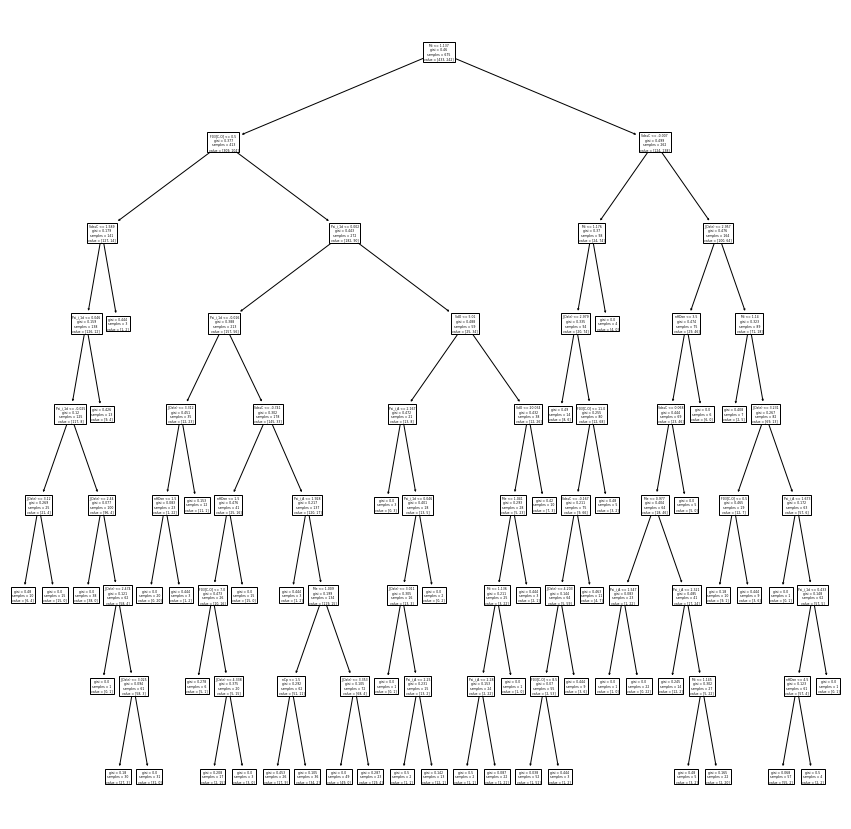

In [20]:
#displat visual tree
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15)) # increase the value if the size of the image is too small
plot_tree(model_best, feature_names=list(X_arr))
plt.show()

In [21]:
#set dataset size into two features
X2_train = X_train[0:,:2]
index = np.where(y_train=='RB')[0]
X2_train_normal = X2_train[index]
y2_train_normal = y_train[index]
index = np.where(y_train=='NRB')[0]
X2_train_abnormal = X2_train[index]
y2_train_abnormal = y_train[index]
model_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=d, random_state=seed_num)
model_dt.fit(X2_train, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=10, random_state=10)

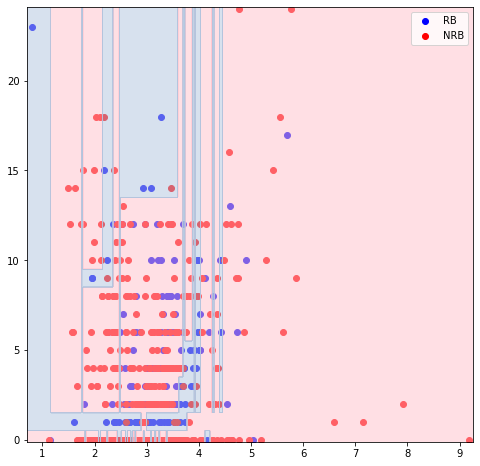

In [22]:
#plot graph for visual representation
from matplotlib.colors import ListedColormap
cmap_regions = ListedColormap(['pink', 'lightsteelblue'])
step = 0.02
offset = 0.1
xx1_min, xx1_max = X_train[:,0].min()-offset, X_train[:,0].max()+offset
xx2_min, xx2_max = X_train[:,1].min()-offset, X_train[:,1].max()+offset
xx1,xx2 = np.meshgrid(np.arange(xx1_min, xx1_max, step), np.arange(xx2_min, xx2_max, step))
zz = model_dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
zz = y_to_numeric(zz)
zz = zz.reshape(xx1.shape)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(X2_train_normal[:,0], X2_train_normal[:,1], c='blue', label='RB')
ax.scatter(X2_train_abnormal[:,0], X2_train_abnormal[:,1], c='red', label='NRB')
ax.contourf(xx1, xx2, zz, cmap=cmap_regions, alpha=0.5)
plt.legend()